In [1]:
# imports
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, stdev
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestRegressor

# Data loading

In [2]:
data = load_diabetes(as_frame=True).frame

In [3]:
info = load_diabetes().DESCR
print(info)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [5]:
# With this command, we can see that there are no missing values in any of the columns
data.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bp'}>, <Axes: title={'center': 's1'}>,
        <Axes: title={'center': 's2'}>],
       [<Axes: title={'center': 's3'}>, <Axes: title={'center': 's4'}>,
        <Axes: title={'center': 's5'}>],
       [<Axes: title={'center': 's6'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

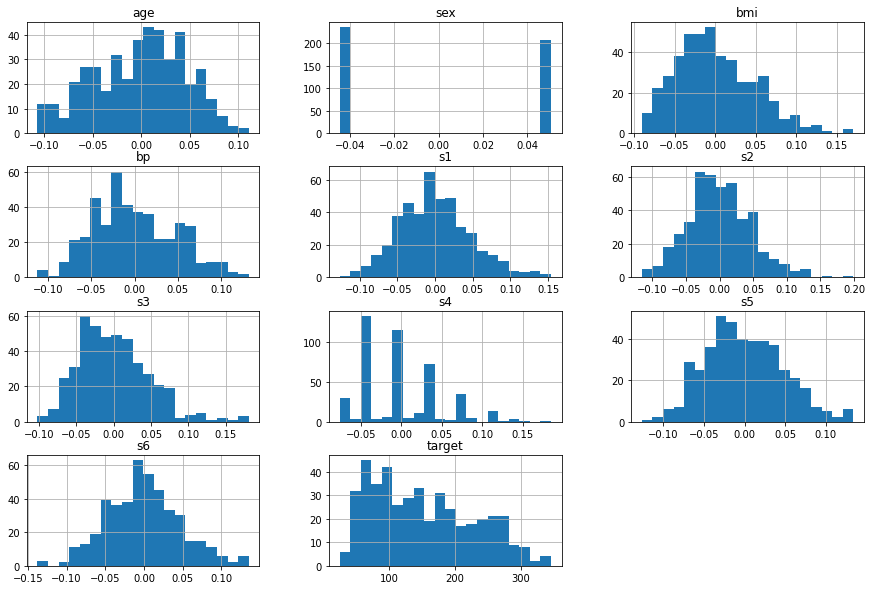

In [7]:
data.hist(bins=20, figsize=(15,10))

In [8]:
features = data[data.columns[:-1]]
target = data["target"]

In [9]:
# Data is split for training and testing. 20% for testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [10]:
# Correlation matrix
print(data.corr())

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6   

<Axes: >

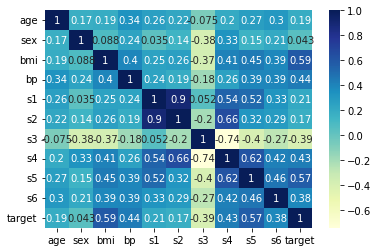

In [11]:
# Correlation heatmap in Seaborn
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

With the heatmap, it can be observed that the variables that are most correlated to the target are:
* BMI
* S5
* BP
* S4

The rest have a correlation under 0.4

In [12]:
# This can be confirmed by obtaining the correlation values of the features to the target, and sorting them
data.corr()['target'].abs().sort_values(ascending= False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s3        0.394789
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
Name: target, dtype: float64

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


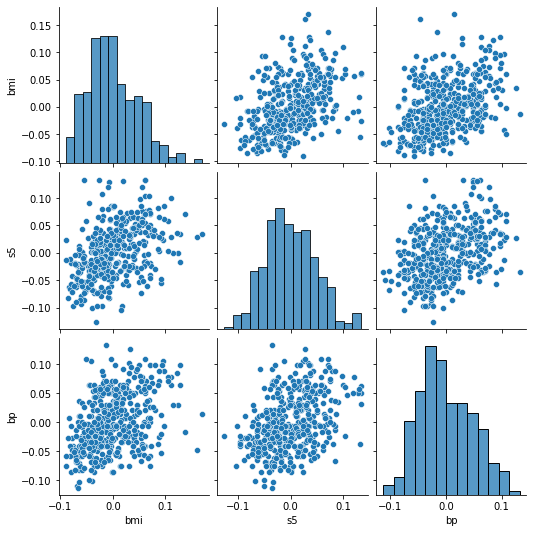

In [13]:
# Comparing scatterplots relations of the 3 features with the highest correlation to the target
sns.pairplot(data[["bmi", "s5", "bp"]])

# Model training

## Linear Regression

In [14]:
model_performance = {}

In [15]:
# The model is trained
reg = LinearRegression()
reg.fit(X=X_train, y=y_train)

LinearRegression()

In [16]:
# Predictions are obtained
predicted = reg.predict(X_test)

In [17]:
# The model is evaluated
mse = mean_squared_error(y_test, predicted)
rmse = sqrt(mse)
print(rmse)

53.85344583676593


## Decision Tree

In [18]:
# The decision tree is created
regressor = DecisionTreeRegressor(random_state=0)

In [19]:
cros_val_score = cross_val_score(regressor, X_train, y_train, cv=10)
cros_val_score

array([ 0.06769783, -0.55098889, -0.01901324, -1.46653656,  0.08359486,
       -0.06478693,  0.32723069, -0.08756245, -0.89688259, -0.30307205])

In [20]:
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)
mse = mean_squared_error(y_test, predicted)
rmse = sqrt(mse)
print(rmse)

72.89818974032023


In [21]:
s = 0
for score in cros_val_score:
    s+=(score**2)
rm = sqrt(s)
print("Root Mean: {}".format(rm))
stan_dev = stdev(cros_val_score)
print("Standard Deviation: {}".format(stan_dev))

Root Mean: 1.8658634273977488
Standard Deviation: 0.5410330119364074


## Random Forest

In [22]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

In [23]:
cros_val_score = cross_val_score(regr, X_train, y_train, cv=10)
cros_val_score

array([ 0.58763077,  0.33251202,  0.53586021, -0.63044265,  0.35601513,
        0.47235979,  0.58191516,  0.49307431,  0.01923789,  0.45964921])

In [24]:
regr.fit(X_train, y_train)
predicted = regr.predict(X_test)
mse = mean_squared_error(y_test, predicted)
rmse = sqrt(mse)
print(rmse)

55.0919125432918


In [25]:
s = 0
for score in cros_val_score:
    s+=(score**2)
rm = sqrt(s)
print("Root Mean: {}".format(rm))
stan_dev = stdev(cros_val_score)
print("Standard Deviation: {}".format(stan_dev))

Root Mean: 1.5112060829745846
Standard Deviation: 0.3733836486388329


It can be observed that the Random Forest regressor has a lower RMSE, which may indicate a better performance. 

# Model Tuning

In [26]:
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [27]:
used_cols = X_train.columns.to_list()
sorted(zip(regr.feature_importances_,used_cols), reverse=True)

[(0.3455801441286151, 'bmi'),
 (0.24495647627145614, 's5'),
 (0.09403935044060016, 'bp'),
 (0.06756341650668303, 's6'),
 (0.0597284980110496, 'age'),
 (0.053861547369731415, 's2'),
 (0.05310413572438317, 's1'),
 (0.04775574946569963, 's3'),
 (0.024519243671446932, 's4'),
 (0.008891438410334825, 'sex')]

It can be seen that the four most important features for the Random Forest regressor are: 
* BMI
* S5
* BP
* S6

These features are almost identical to the ones determined to be most correlated to the target in the previous heatmap. 
The only difference is S6, which is substituting for S4. 

Now, the model will be evaluated with different parameters

In [28]:
regr1 = RandomForestRegressor(max_depth=10, random_state=0)

In [29]:
parameters1 = {"n_estimators":[3,10,30], "max_features": [2,4,6,8]}

In [30]:
clf1 = GridSearchCV(regr1, parameters1)
clf1

GridSearchCV(estimator=RandomForestRegressor(max_depth=10, random_state=0),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]})

In [31]:
clf1.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(max_depth=10, random_state=0),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]})

In [32]:
# We get our best model
clf1.best_params_

{'max_features': 6, 'n_estimators': 30}

In [33]:
clf1.best_estimator_

RandomForestRegressor(max_depth=10, max_features=6, n_estimators=30,
                      random_state=0)

In [34]:
# We confirm that this is the best estimator
test1_best_estimator = clf1.best_estimator_
print(test1_best_estimator)
predicted = test1_best_estimator.predict(X_test)
mse = mean_squared_error(y_test, predicted)
rmse = sqrt(mse)
print(rmse)

RandomForestRegressor(max_depth=10, max_features=6, n_estimators=30,
                      random_state=0)
53.55797602552637


It can be confirmed that this is the best estimator.
Now, the feature importance can be obtained

In [35]:
sorted(zip(test1_best_estimator.feature_importances_,used_cols), reverse=True)

[(0.28472235742142626, 'bmi'),
 (0.26332313668402363, 's5'),
 (0.0884519055989337, 'bp'),
 (0.07949754980457359, 's3'),
 (0.06513667120238636, 's6'),
 (0.06178311865794779, 's2'),
 (0.05568059464966479, 'age'),
 (0.05520205445637127, 's1'),
 (0.03518357069609825, 's4'),
 (0.011019040828574451, 'sex')]

In [36]:
combination_scores = list(zip(clf1.cv_results_["params"],clf1.cv_results_["mean_test_score"]))
for param in combination_scores:
    print(param)

({'max_features': 2, 'n_estimators': 3}, 0.15082142388253145)
({'max_features': 2, 'n_estimators': 10}, 0.33115918042352865)
({'max_features': 2, 'n_estimators': 30}, 0.3900963109933241)
({'max_features': 4, 'n_estimators': 3}, 0.18384897037485004)
({'max_features': 4, 'n_estimators': 10}, 0.33391929569854406)
({'max_features': 4, 'n_estimators': 30}, 0.3852869830535645)
({'max_features': 6, 'n_estimators': 3}, 0.28472499524706035)
({'max_features': 6, 'n_estimators': 10}, 0.3868302482800685)
({'max_features': 6, 'n_estimators': 30}, 0.40008164324986106)
({'max_features': 8, 'n_estimators': 3}, 0.1919767419341082)
({'max_features': 8, 'n_estimators': 10}, 0.3412867806091411)
({'max_features': 8, 'n_estimators': 30}, 0.3867555069494094)


Now another test can be performed, with Bootstrap = False

In [37]:
regr2 = RandomForestRegressor(max_depth=10, random_state=0)
parameters2 = {"n_estimators":[3,10], "max_features": [2,3,4], "bootstrap": [False]}
clf2 = GridSearchCV(regr2, parameters2)
clf2

GridSearchCV(estimator=RandomForestRegressor(max_depth=10, random_state=0),
             param_grid={'bootstrap': [False], 'max_features': [2, 3, 4],
                         'n_estimators': [3, 10]})

In [38]:
clf2.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(max_depth=10, random_state=0),
             param_grid={'bootstrap': [False], 'max_features': [2, 3, 4],
                         'n_estimators': [3, 10]})

In [39]:
clf2.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}

In [40]:
# We confirm that this is the best estimator
test2_best_estimator = clf2.best_estimator_
print(test2_best_estimator)
predicted = test2_best_estimator.predict(X_test)
mse = mean_squared_error(y_test, predicted)
rmse = sqrt(mse)
print(rmse)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features=2,
                      n_estimators=10, random_state=0)
55.583919050551245


It can be confirmed that this is the best estimator.
Now, the feature importance can be obtained

In [41]:
sorted(zip(test2_best_estimator.feature_importances_,used_cols), reverse=True)

[(0.2289532256531942, 'bmi'),
 (0.1496923224328065, 's5'),
 (0.12372778030098502, 'bp'),
 (0.1194241622932096, 's4'),
 (0.10493808514531346, 's3'),
 (0.08382319762758027, 's6'),
 (0.061247134573622804, 's1'),
 (0.058513608204815847, 's2'),
 (0.05380652448441325, 'age'),
 (0.015873959284059123, 'sex')]

In [42]:
combination_scores = list(zip(clf2.cv_results_["params"],clf2.cv_results_["mean_test_score"]))
for param in combination_scores:
    print(param)

({'bootstrap': False, 'max_features': 2, 'n_estimators': 3}, 0.197818673279216)
({'bootstrap': False, 'max_features': 2, 'n_estimators': 10}, 0.3412063067537131)
({'bootstrap': False, 'max_features': 3, 'n_estimators': 3}, 0.09073814078864058)
({'bootstrap': False, 'max_features': 3, 'n_estimators': 10}, 0.29970534501005935)
({'bootstrap': False, 'max_features': 4, 'n_estimators': 3}, 0.16611604518502707)
({'bootstrap': False, 'max_features': 4, 'n_estimators': 10}, 0.31808764874286843)


After obtaining the feature importance of both models, it can be observed that the features considered to be the most relevant in both models, 3 out of the first 4 are the ones obtained as the most correlated to the target in the previous heatmap. BMI, S5 and BP are consistent in every model. 

# Model Evaluation

It can be observed that this model:

    RandomForestRegressor(max_depth=10, max_features=6, n_estimators=30,
                      random_state=0)
                      
Obtained the lowest RMSE out of every tested model.


In [43]:
# Now, this model can be saved for later use:
from joblib import dump, load
dump(test1_best_estimator, 'best_model.joblib')

['best_model.joblib']

In [44]:
testing = load('best_model.joblib')
testing.predict(X_test)

array([134.54749827, 195.45743525, 151.46190476, 247.7124515 ,
       118.82770971, 116.19545492, 256.09951659, 210.02380952,
       150.84778613, 167.35284314,  95.84192247, 165.03306878,
        90.14595194, 224.61028219,  88.79594398, 128.31412232,
       241.31571429, 234.74380952, 188.33333333, 229.87517637,
       180.84365079, 110.77453431,  65.42147571, 217.02729744,
       152.89043712, 163.99871795, 209.73681319, 147.7299081 ,
        66.12106566, 106.00859496, 145.43302005,  93.21052864,
       173.92245234, 196.20410788, 170.25453266, 211.50046898,
       113.18857653, 117.75376459, 179.22679012,  71.76275771,
        74.62428985,  90.88396093, 168.88364198, 155.69276896,
       172.86907167,  90.98636718,  74.70446806, 108.58575724,
        76.44079426, 157.6       , 107.88978836,  95.95688259,
       172.33015873,  95.36760534, 181.0494824 , 130.0731746 ,
        91.44977864, 238.96823422,  85.56451065,  78.7665424 ,
       149.05815338, 173.91865079, 135.80416667, 104.77

Now it can be compared to the model for assignment 1

In [45]:
## Assignment 1
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [46]:
predicted = reg.predict(X_test)
actual = y_test.values
coef = reg.coef_
mse = mean_squared_error(actual, predicted)
rmse = sqrt(mse)
print(rmse)

53.85344583676593


In [47]:
reg = RandomForestRegressor(max_depth=10, max_features=6, n_estimators=30,
                  random_state=0)
reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=6, n_estimators=30,
                      random_state=0)

In [48]:
predicted = reg.predict(X_test)
actual = y_test.values
mse = mean_squared_error(actual, predicted)
rmse = sqrt(mse)
print(rmse)

53.55797602552637


It can be seen that the new model has a better performance that the model for assignment 1, but just barely